# Dependency Extraction Comparison

## Step 1: Compare raw.ta files

In [ ]:
raw_ta_1 = "./source_raw_ta/dependencies_1.raw.ta"
raw_ta_2 = "./source_raw_ta/dependencies_2.raw.ta"
raw_ta_3 = "./source_raw_ta/dependencies_3.raw.ta"

dependencies = {}

def addDependency(dep, num):
  if dep in dependencies:
    dependencies[dep].append(num)
  else:
    dependencies[dep] = [num]

with open(raw_ta_1, 'r') as file:
  content = file.read()
  content_lines = content.replace('"', '').replace("\\", "/").replace('java/org/apache', 'java/org/apache/flink').split('\n')
  for line in content_lines:
    if "cLinks" in line:
      addDependency(line, 1)

with open(raw_ta_2, 'r') as file:
  content = file.read()
  content_lines = content.replace('"', '').replace("\\", "/").split('\n')
  for line in content_lines:
    if "cLinks" in line:
      addDependency(line, 2)

with open(raw_ta_3, 'r') as file:
  content = file.read()
  content_lines = content.replace('"', '').replace("\\", "/").replace('./', '').split('\n')
  for line in content_lines:
    if "cLinks" in line:
      addDependency(line, 3)

## Step 2: Generate venn diagram values

In [53]:
tech_1 = 0
tech_2 = 0
tech_3 = 0
tech_12 = 0
tech_13 = 0
tech_23 = 0
tech_123 = 0

dep_just_in_1 = []
dep_just_in_2 = []
dep_just_in_3 = []

for dep in dependencies:
  if 1 in dependencies[dep] and 2 in dependencies[dep] and 3 in dependencies[dep]:
    tech_123 += 1
  elif 1 in dependencies[dep] and 2 in dependencies[dep]:
    tech_12 += 1
  elif 1 in dependencies[dep] and 3 in dependencies[dep]:
    tech_13 += 1
  elif 2 in dependencies[dep] and 3 in dependencies[dep]:
    tech_23 += 1
  elif 1 in dependencies[dep]:
    tech_1 += 1
    dep_just_in_1.append(dep)
  elif 2 in dependencies[dep]:
    tech_2 += 1
    dep_just_in_2.append(dep)
  elif 3 in dependencies[dep]:
    tech_3 += 1
    dep_just_in_3.append(dep)
  
print("tech_1: ", tech_1)
print("tech_2: ", tech_2)
print("tech_3: ", tech_3)
print("tech_12: ", tech_12)
print("tech_13: ", tech_13)
print("tech_23: ", tech_23)
print("tech_123: ", tech_123)

tech_1:  34055
tech_2:  21505
tech_3:  37996
tech_12:  1036
tech_13:  1065
tech_23:  74899
tech_123:  6309


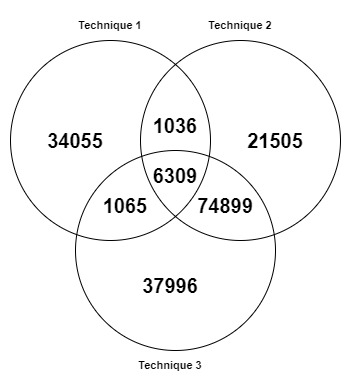

## Step 3: Sample non overlapping

In [52]:
import random

output_1 = "./output/sample_1.txt"
output_2 = "./output/sample_2.txt"
output_3 = "./output/sample_3.txt"

sample_amount_1 = 139
sample_amount_2 = 88
sample_amount_3 = 156

sample_1 = random.sample(dep_just_in_1, sample_amount_1)
sample_2 = random.sample(dep_just_in_2, sample_amount_2)
sample_3 = random.sample(dep_just_in_3, sample_amount_3)

with open(output_1, 'w') as txt_file:
    for line in sample_1:
        txt_file.write("".join(line) + "\n")

with open(output_2, 'w') as txt_file:
    for line in sample_2:
        txt_file.write("".join(line) + "\n")

with open(output_3, 'w') as txt_file:
    for line in sample_3:
        txt_file.write("".join(line) + "\n")
